**<center> Joaquin Peñuela Parra, Cristian Fernando Rodriguez Cruz <center>**
**<center> University of Los Andes <center>**
**<center> High Energy Physics Group: Phenomenology of Particles <center>**

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"

In [2]:
betards = ['wRHC', 'woRHC']
titulos_izquierda = {'Lq_Lq' : 'dLQ', 'tau_Lq' : 'sLQ', 'tau_tau' : 'non-res', 'Combined' : 'Combined'}
betard_title = {'wRHC': r'$, \mathbf{\beta_{R} = -1}$', 'woRHC': r'$, \mathbf{\beta_{R} = 0}$'}

def Calcular_g_U(c_U, M):
    v = 246
    return 2*np.sqrt(c_U)*M/v

**Sigma Curves Summary 137 fb-1:** 

In [3]:
file = open("Significances/sigma_curves_137.pkl", 'rb')
sigma_curves_137 = pickle.load(file)
file.close()

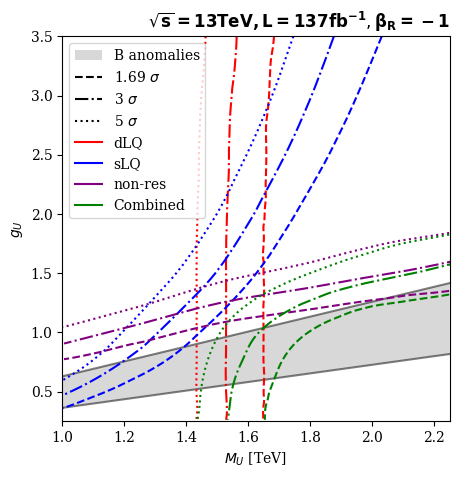

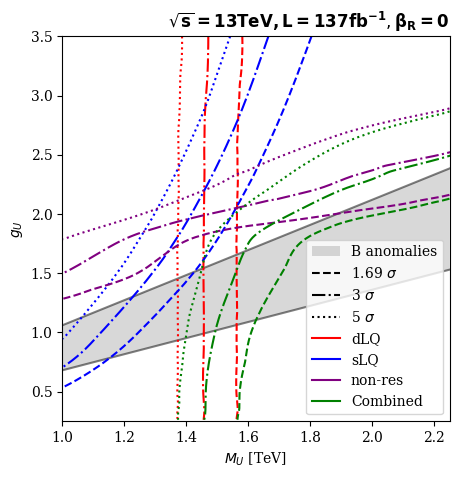

In [4]:
colors = {'Lq_Lq': 'red', 'tau_Lq': 'blue', 'tau_tau': 'purple', 'Combined': 'green'}

for betard in betards:    
    
    fig, ax = plt.subplots(figsize = (5,5))
    
    if betard == 'wRHC': c_u1, c_u2 = 0.006, 0.002
    else:  c_u1, c_u2 = 0.017, 0.007

    x = np.linspace(1000/1000, 2250/1000, 1000)

    x_1, y_1 = 1000/1000, Calcular_g_U(c_u1, 1000)
    x_2, y_2 = 2250/1000, Calcular_g_U(c_u1, 2250)

    y1 = np.poly1d(np.polyfit([x_1,x_2], [y_1, y_2], deg=1))(x)

    x_3, y_3 = 1000/1000, Calcular_g_U(c_u2, 1000)
    x_4, y_4 = 2250/1000, Calcular_g_U(c_u2, 2250)

    y2 = np.poly1d(np.polyfit([x_3,x_4], [y_3, y_4], deg=1))(x)

    ax.plot(x, y1, c='black', alpha=0.5)
    ax.plot(x, y2, c='black', alpha=0.5)

    x = np.concatenate((x[0], x, x[-1]), axis = None)
    y = np.concatenate((y2[0], y1, y2[-1]), axis = None)
    ax.fill(x, y, 'gray', alpha=0.3, label = 'B anomalies')  
    
    for n, key in enumerate(sigma_curves_137[betard]):
        
        curves = sigma_curves_137[betard][key]
        
        #Curva de 1.69 sigma
        x1 = np.concatenate([points.vertices[:,0] for points in curves.collections[0].get_paths()])
        y1 = np.concatenate([points.vertices[:,1] for points in curves.collections[0].get_paths()])

        #Curva de 3 sigma
        x2 = np.concatenate([points.vertices[:,0] for points in curves.collections[1].get_paths()])
        y2 = np.concatenate([points.vertices[:,1] for points in curves.collections[1].get_paths()])

        #Curva de 5 sigma
        x3 = np.concatenate([points.vertices[:,0] for points in curves.collections[2].get_paths()])
        y3 = np.concatenate([points.vertices[:,1] for points in curves.collections[2].get_paths()])
        
        if n == 0:
            plt.plot(0,0, label = r'1.69 $\sigma$', linestyle = 'dashed', c = 'black')
            plt.plot(0,0, label = r'3 $\sigma$', linestyle = 'dashdot', c = 'black')
            plt.plot(0,0, label = r'5 $\sigma$', linestyle = 'dotted', c = 'black')
            
        plt.plot(0,0, color = colors[key], label = titulos_izquierda[key])
        plt.plot(x1[: len(x1) - 2],y1[: len(x1) - 2], linestyle = 'dashed', color = colors[key])
        plt.plot(x2[: len(x2) - 2],y2[: len(x2) - 2], linestyle = 'dashdot', color = colors[key])
        plt.plot(x3[: len(x3) - 2],y3[: len(x3) - 2], linestyle = 'dotted', color = colors[key])   
        
    plt.legend()
    plt.xlim(1,2.25)
    plt.ylim(0.25,3.5)
    plt.title(r'$\mathbf{\sqrt{s} = 13 TeV, L = 137 fb^{-1}}$'+ betard_title[betard], loc = 'right')
    plt.xlabel(r'$M_{U}$ [TeV]')
    plt.ylabel(r'$g_U$')
    
    plt.savefig(f'Significances/Significance_Curves_13TeV_L137_summary_all_sigmas_{betard}.png', bbox_inches='tight')

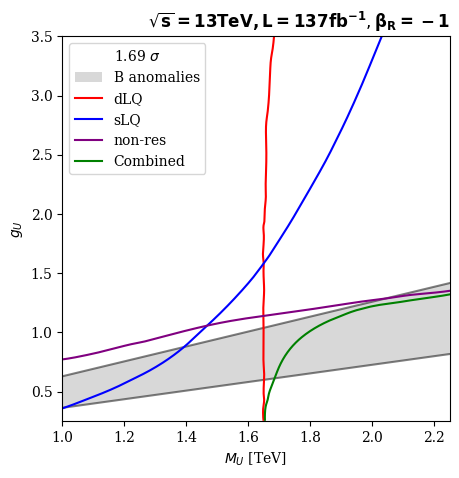

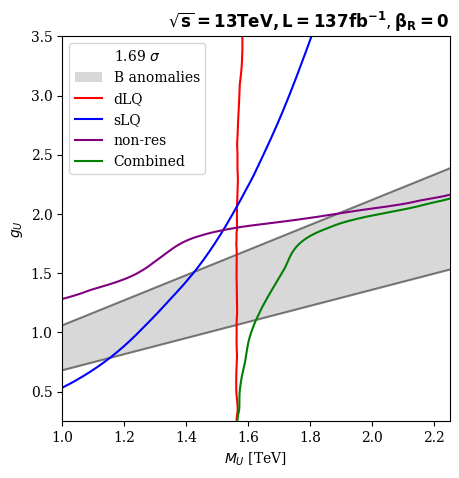

In [5]:
colors = {'Lq_Lq': 'red', 'tau_Lq': 'blue', 'tau_tau': 'purple', 'Combined': 'green'}

for betard in betards:    
    
    fig, ax = plt.subplots(figsize = (5,5))
    
    if betard == 'wRHC': c_u1, c_u2 = 0.006, 0.002
    else:  c_u1, c_u2 = 0.017, 0.007

    x = np.linspace(1000/1000, 2250/1000, 1000)

    x_1, y_1 = 1000/1000, Calcular_g_U(c_u1, 1000)
    x_2, y_2 = 2250/1000, Calcular_g_U(c_u1, 2250)

    y1 = np.poly1d(np.polyfit([x_1,x_2], [y_1, y_2], deg=1))(x)

    x_3, y_3 = 1000/1000, Calcular_g_U(c_u2, 1000)
    x_4, y_4 = 2250/1000, Calcular_g_U(c_u2, 2250)

    y2 = np.poly1d(np.polyfit([x_3,x_4], [y_3, y_4], deg=1))(x)

    ax.plot(x, y1, c='black', alpha=0.5)
    ax.plot(x, y2, c='black', alpha=0.5)

    x = np.concatenate((x[0], x, x[-1]), axis = None)
    y = np.concatenate((y2[0], y1, y2[-1]), axis = None)
    ax.fill(x, y, 'gray', alpha=0.3, label = 'B anomalies')  
    
    for n, key in enumerate(sigma_curves_137[betard]):
        
        curves = sigma_curves_137[betard][key]
        
        #Curva de 1.69 sigma
        x1 = np.concatenate([points.vertices[:,0] for points in curves.collections[0].get_paths()])
        y1 = np.concatenate([points.vertices[:,1] for points in curves.collections[0].get_paths()])
            
        plt.plot(0,0, color = colors[key], label = titulos_izquierda[key])
        plt.plot(x1[: len(x1) - 2],y1[: len(x1) - 2], linestyle = '-', color = colors[key])
    
        
    plt.legend(title = r'1.69 $\sigma$')
    plt.xlim(1,2.25)
    plt.ylim(0.25,3.5)
    plt.title(r'$\mathbf{\sqrt{s} = 13 TeV, L = 137 fb^{-1}}$'+ betard_title[betard], loc = 'right')
    plt.xlabel(r'$M_{U}$ [TeV]')
    plt.ylabel(r'$g_U$')
    
    plt.savefig(f'Significances/Significance_Curves_13TeV_L137_summary_sigma_1_69_{betard}.png', bbox_inches='tight')

**Comparison between doing as CMS and doing good:** 

In [6]:
file = open("Significances/sigma_curves_CMS_Comparison.pkl", 'rb')
sigma_curves_CMS = pickle.load(file)
file.close()

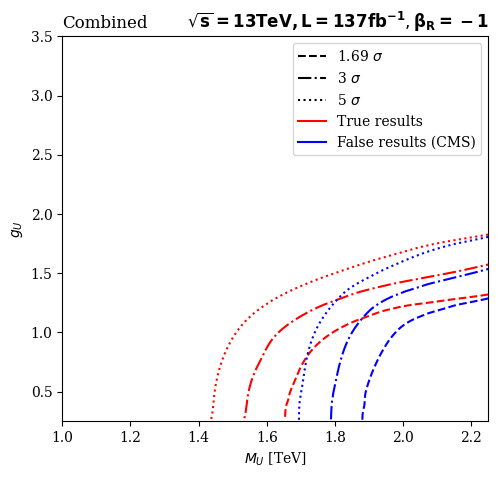

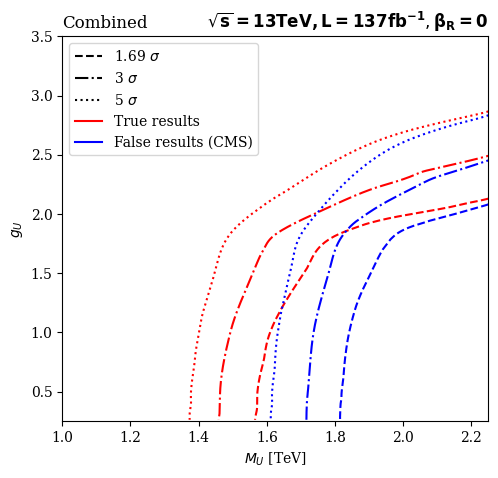

In [7]:
for betard in betards:    
    
    fig, ax = plt.subplots(figsize = (5.5,5))
    
#     if betard == 'wRHC': c_u1, c_u2 = 0.006, 0.002
#     else:  c_u1, c_u2 = 0.017, 0.007

#     x = np.linspace(1000/1000, 2250/1000, 1000)

#     x_1, y_1 = 1000/1000, Calcular_g_U(c_u1, 1000)
#     x_2, y_2 = 2250/1000, Calcular_g_U(c_u1, 2250)

#     y1 = np.poly1d(np.polyfit([x_1,x_2], [y_1, y_2], deg=1))(x)

#     x_3, y_3 = 1000/1000, Calcular_g_U(c_u2, 1000)
#     x_4, y_4 = 2250/1000, Calcular_g_U(c_u2, 2250)

#     y2 = np.poly1d(np.polyfit([x_3,x_4], [y_3, y_4], deg=1))(x)

#     ax.plot(x, y1, c='black', alpha=0.5)
#     ax.plot(x, y2, c='black', alpha=0.5)

#     x = np.concatenate((x[0], x, x[-1]), axis = None)
#     y = np.concatenate((y2[0], y1, y2[-1]), axis = None)
#     ax.fill(x, y, 'gray', alpha=0.3, label = 'B anomalies')  
    
    curves = sigma_curves_137[betard]['Combined']
    
    #Curva de 1.69 sigma
    x1 = np.concatenate([points.vertices[:,0] for points in curves.collections[0].get_paths()])
    y1 = np.concatenate([points.vertices[:,1] for points in curves.collections[0].get_paths()])

    #Curva de 3 sigma
    x2 = np.concatenate([points.vertices[:,0] for points in curves.collections[1].get_paths()])
    y2 = np.concatenate([points.vertices[:,1] for points in curves.collections[1].get_paths()])

    #Curva de 5 sigma
    x3 = np.concatenate([points.vertices[:,0] for points in curves.collections[2].get_paths()])
    y3 = np.concatenate([points.vertices[:,1] for points in curves.collections[2].get_paths()])

    plt.plot(0,0, label = r'1.69 $\sigma$', linestyle = 'dashed', c = 'black')
    plt.plot(0,0, label = r'3 $\sigma$', linestyle = 'dashdot', c = 'black')
    plt.plot(0,0, label = r'5 $\sigma$', linestyle = 'dotted', c = 'black')

    plt.plot(0,0, color = 'red', label = 'True results')
    plt.plot(x1[: len(x1) - 2],y1[: len(x1) - 2], linestyle = 'dashed', color = 'red')
    plt.plot(x2[: len(x2) - 2],y2[: len(x2) - 2], linestyle = 'dashdot', color = 'red')
    plt.plot(x3[: len(x3) - 2],y3[: len(x3) - 2], linestyle = 'dotted', color = 'red')     
    
    curves = sigma_curves_CMS[betard]['Combined']
    
    #Curva de 1.69 sigma
    x1 = np.concatenate([points.vertices[:,0] for points in curves.collections[0].get_paths()])
    y1 = np.concatenate([points.vertices[:,1] for points in curves.collections[0].get_paths()])

    #Curva de 3 sigma
    x2 = np.concatenate([points.vertices[:,0] for points in curves.collections[1].get_paths()])
    y2 = np.concatenate([points.vertices[:,1] for points in curves.collections[1].get_paths()])

    #Curva de 5 sigma
    x3 = np.concatenate([points.vertices[:,0] for points in curves.collections[2].get_paths()])
    y3 = np.concatenate([points.vertices[:,1] for points in curves.collections[2].get_paths()])

    plt.plot(0,0, color = 'blue', label = 'False results (CMS)')
    plt.plot(x1[: len(x1) - 2],y1[: len(x1) - 2], linestyle = 'dashed', color = 'blue')
    plt.plot(x2[: len(x2) - 2],y2[: len(x2) - 2], linestyle = 'dashdot', color = 'blue')
    plt.plot(x3[: len(x3) - 2],y3[: len(x3) - 2], linestyle = 'dotted', color = 'blue')   
        
    plt.legend()
    plt.xlim(1,2.25)
    plt.ylim(0.25,3.5)
    plt.title(r'$\mathbf{\sqrt{s} = 13 TeV, L = 137 fb^{-1}}$'+ betard_title[betard], loc = 'right')
    plt.title('Combined', loc = 'left')
    plt.xlabel(r'$M_{U}$ [TeV]')
    plt.ylabel(r'$g_U$')
    
    plt.savefig(f'Significances/Significance_Curves_True_and_False_{betard}.png', bbox_inches='tight')

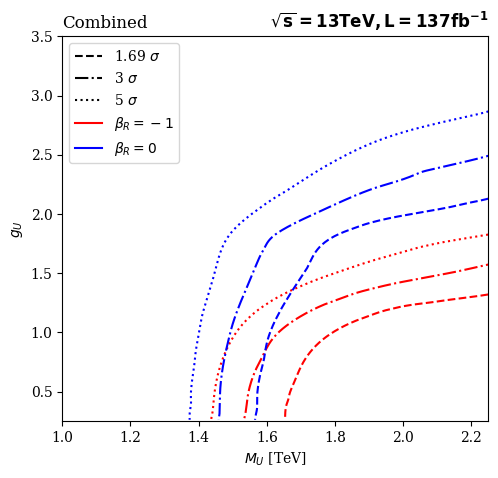

In [8]:
fig, ax = plt.subplots(figsize = (5.5,5))

curves = sigma_curves_137['wRHC']['Combined']

#Curva de 1.69 sigma
x1 = np.concatenate([points.vertices[:,0] for points in curves.collections[0].get_paths()])
y1 = np.concatenate([points.vertices[:,1] for points in curves.collections[0].get_paths()])

#Curva de 3 sigma
x2 = np.concatenate([points.vertices[:,0] for points in curves.collections[1].get_paths()])
y2 = np.concatenate([points.vertices[:,1] for points in curves.collections[1].get_paths()])

#Curva de 5 sigma
x3 = np.concatenate([points.vertices[:,0] for points in curves.collections[2].get_paths()])
y3 = np.concatenate([points.vertices[:,1] for points in curves.collections[2].get_paths()])

plt.plot(0,0, label = r'1.69 $\sigma$', linestyle = 'dashed', c = 'black')
plt.plot(0,0, label = r'3 $\sigma$', linestyle = 'dashdot', c = 'black')
plt.plot(0,0, label = r'5 $\sigma$', linestyle = 'dotted', c = 'black')

plt.plot(0,0, color = 'red', label = r'$\beta_{R} = -1$')
plt.plot(x1[: len(x1) - 2],y1[: len(x1) - 2], linestyle = 'dashed', color = 'red')
plt.plot(x2[: len(x2) - 2],y2[: len(x2) - 2], linestyle = 'dashdot', color = 'red')
plt.plot(x3[: len(x3) - 2],y3[: len(x3) - 2], linestyle = 'dotted', color = 'red')     

curves = sigma_curves_137['woRHC']['Combined']

#Curva de 1.69 sigma
x1 = np.concatenate([points.vertices[:,0] for points in curves.collections[0].get_paths()])
y1 = np.concatenate([points.vertices[:,1] for points in curves.collections[0].get_paths()])

#Curva de 3 sigma
x2 = np.concatenate([points.vertices[:,0] for points in curves.collections[1].get_paths()])
y2 = np.concatenate([points.vertices[:,1] for points in curves.collections[1].get_paths()])

#Curva de 5 sigma
x3 = np.concatenate([points.vertices[:,0] for points in curves.collections[2].get_paths()])
y3 = np.concatenate([points.vertices[:,1] for points in curves.collections[2].get_paths()])

plt.plot(0,0, color = 'blue', label = r'$\beta_{R} = 0$')
plt.plot(x1[: len(x1) - 2],y1[: len(x1) - 2], linestyle = 'dashed', color = 'blue')
plt.plot(x2[: len(x2) - 2],y2[: len(x2) - 2], linestyle = 'dashdot', color = 'blue')
plt.plot(x3[: len(x3) - 2],y3[: len(x3) - 2], linestyle = 'dotted', color = 'blue')   

plt.legend()
plt.xlim(1,2.25)
plt.ylim(0.25,3.5)
plt.title(r'$\mathbf{\sqrt{s} = 13 TeV, L = 137 fb^{-1}}$', loc = 'right')
plt.title('Combined', loc = 'left')
plt.xlabel(r'$M_{U}$ [TeV]')
plt.ylabel(r'$g_U$')

plt.savefig(f'Significances/Significance_Curves_Comparing_wRHC_and_woRHC.png', bbox_inches='tight')